In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics

In [2]:
#Importing Dataset
df=pd.read_csv("E:\DATA SCIENCE\data sets\winequality-red.csv")

In [3]:
#Shape of Dataset
df.shape

(1599, 12)

In [4]:
#Head of the Dataset
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Checking Null values in the dataset
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Checking Quality Attribute
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
#Dropping Quality Feature from Dataset
df.drop('quality', axis=1,inplace=True)

In [8]:
#after droppping
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


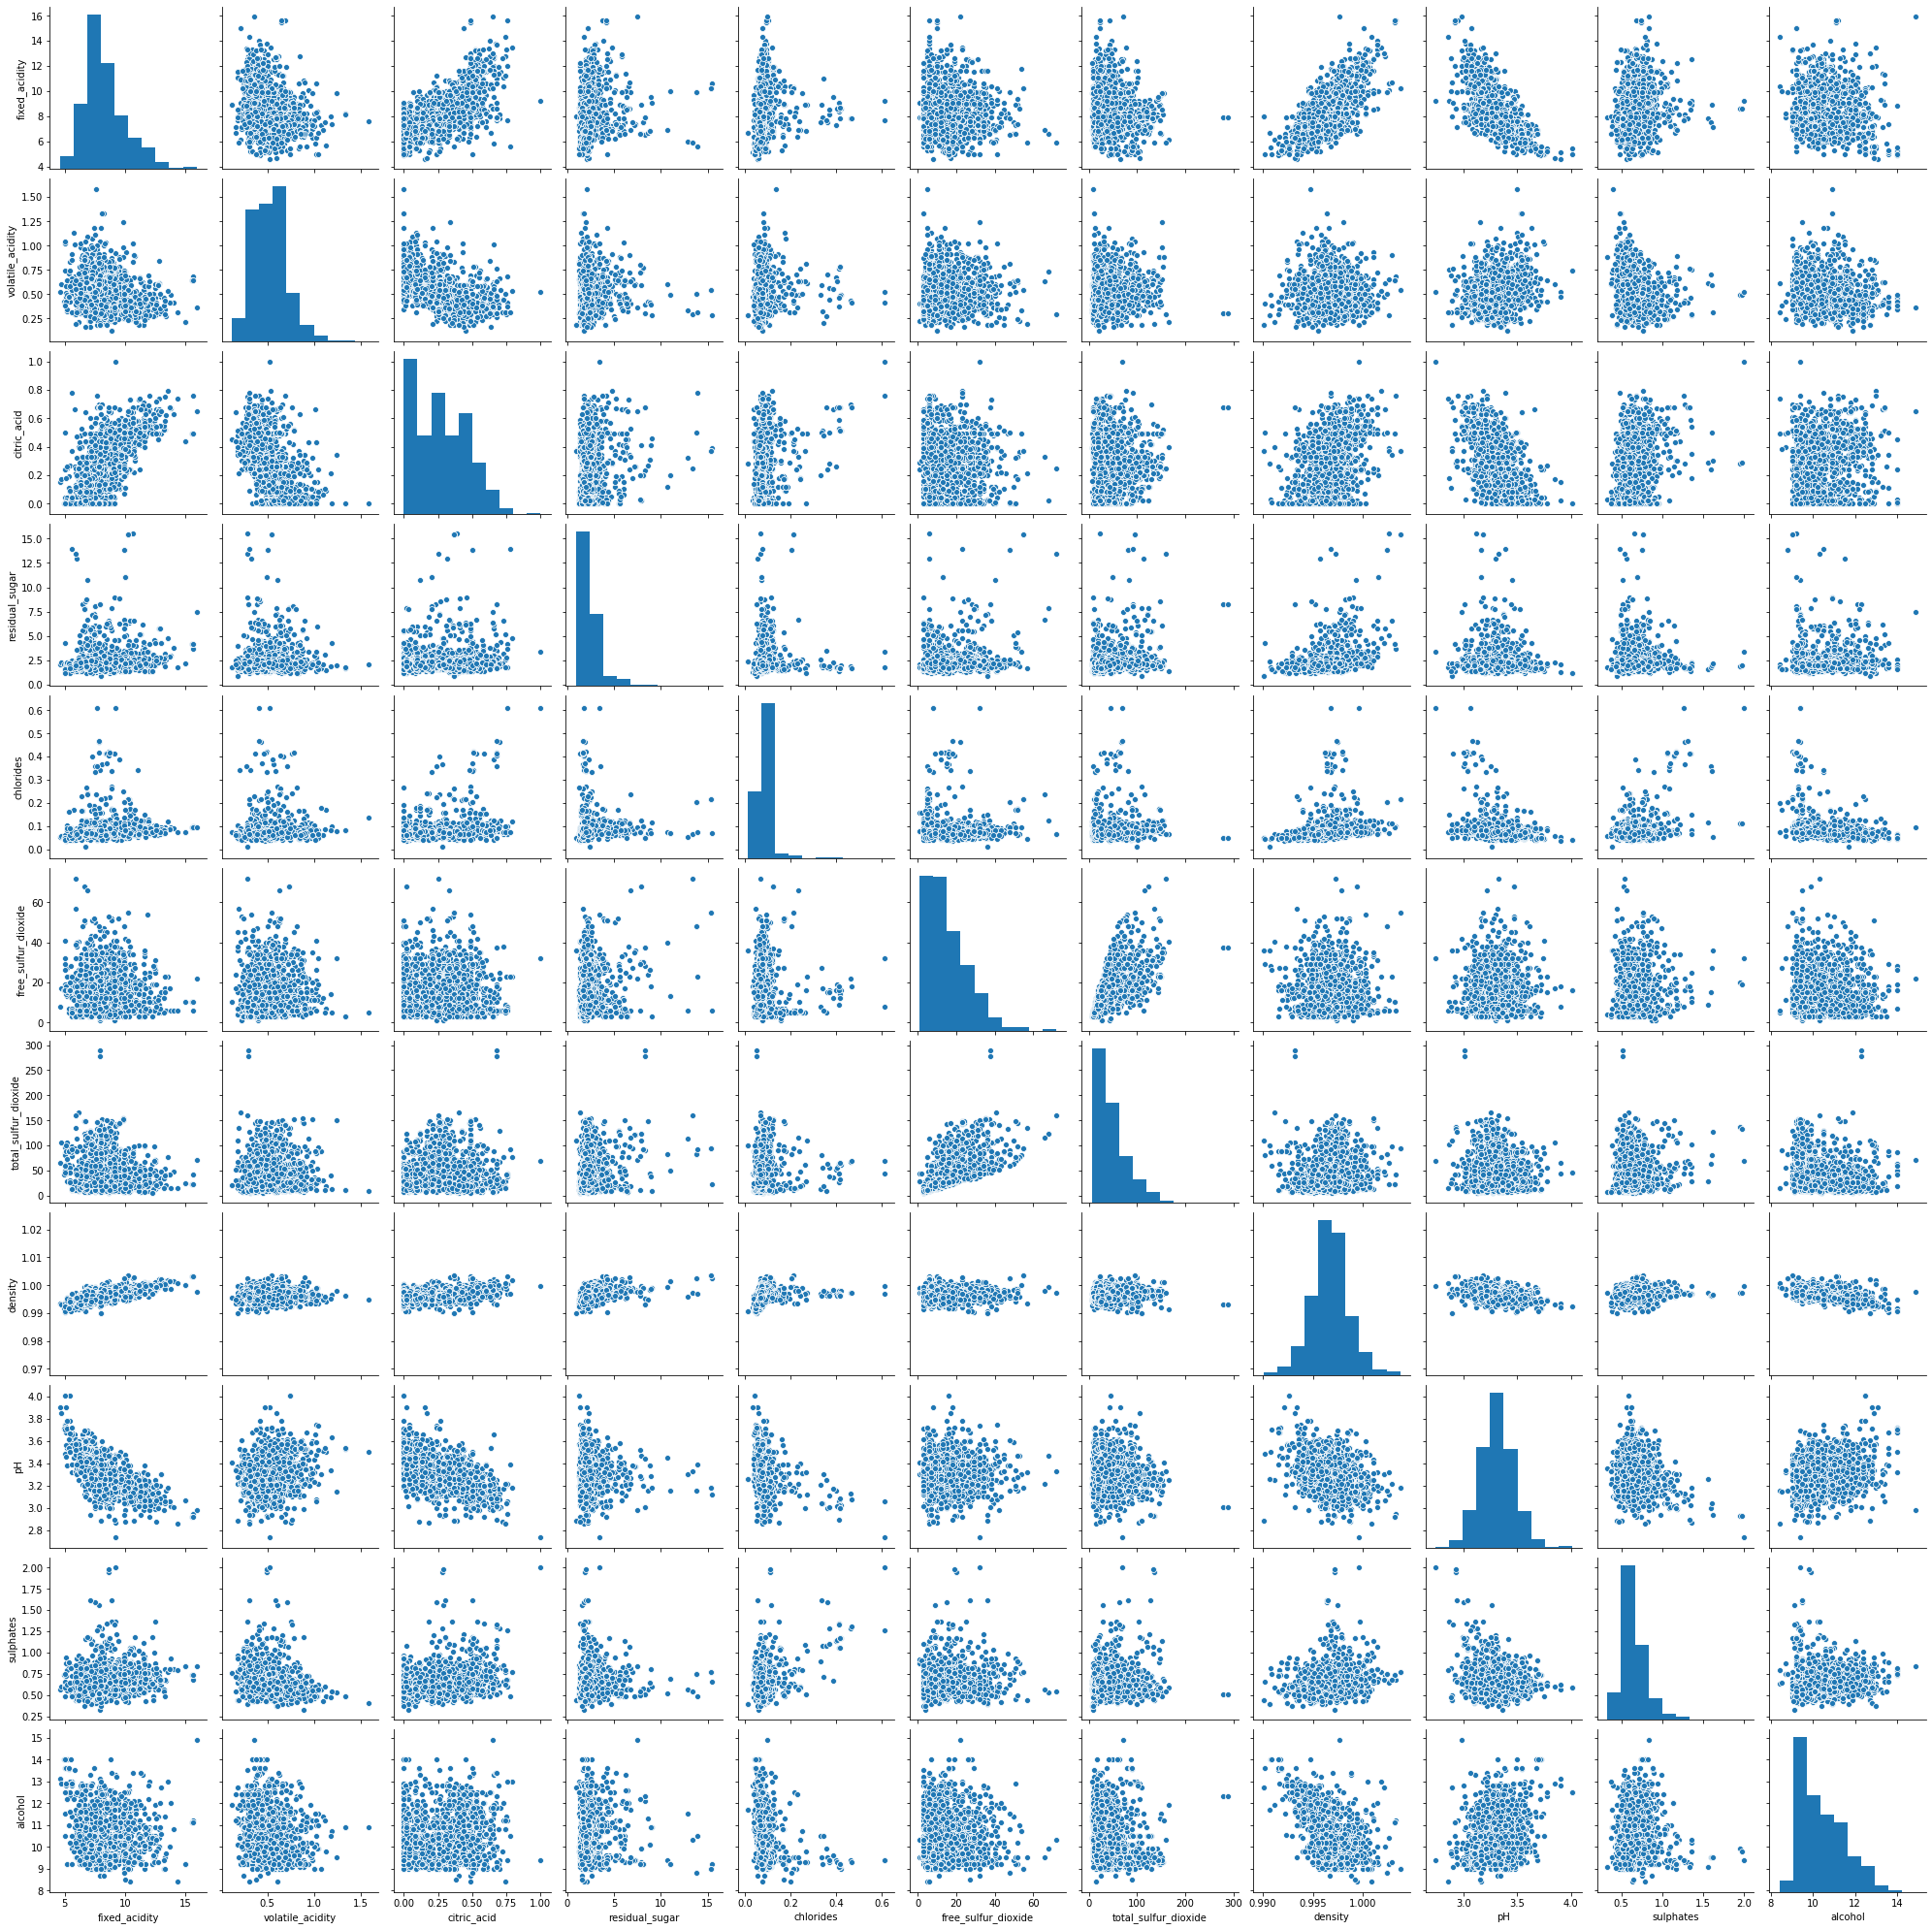

In [9]:
#Checking Pairplot
sns.pairplot(df)

In [10]:
#converting to an array
dataset = df.values
dataset

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [11]:
X = dataset[:,0:10] 
Y = dataset[:,10]

In [12]:
#Scaling the Dataset
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)

In [13]:
X_scale

array([[0.24778761, 0.39726027, 0.        , ..., 0.56754772, 0.60629921,
        0.13772455],
       [0.28318584, 0.52054795, 0.        , ..., 0.49412628, 0.36220472,
        0.20958084],
       [0.28318584, 0.43835616, 0.04      , ..., 0.50881057, 0.40944882,
        0.19161677],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.41629956, 0.53543307,
        0.25149701],
       [0.11504425, 0.35958904, 0.12      , ..., 0.39647577, 0.65354331,
        0.22754491],
       [0.12389381, 0.13013699, 0.47      , ..., 0.3979442 , 0.51181102,
        0.19760479]])

# K-Mean Clustering:

In [14]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [15]:
x=df[['fixed_acidity', 'volatile_acidity']]

In [16]:
#importing Kmeans from scikit learn
from sklearn.cluster import KMeans

In [17]:
model=KMeans(n_clusters=4)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
x["cluster"]=model.predict(x)

C:\Users\MAHESH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
sum_squ_diss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km=km.fit(df)
    sum_squ_diss.append(km.inertia_)

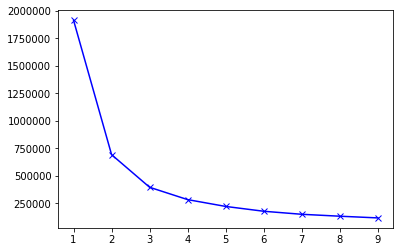

In [20]:
plt.plot(range(1,10),sum_squ_diss,'bx-')
plt.show()

In [21]:
#Capturing Centroids
model.cluster_centers_
cen=model.cluster_centers_
cen

array([[ 8.10663082,  0.53946237],
       [ 9.82981928,  0.47683735],
       [ 6.73275261,  0.56968641],
       [12.23333333,  0.42707407]])

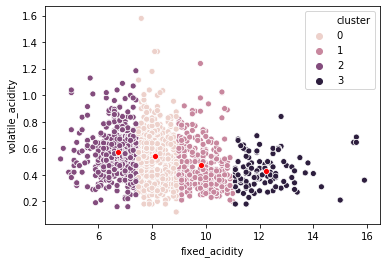

In [22]:
sns.scatterplot(x="fixed_acidity",y="volatile_acidity",hue="cluster",data=x)
sns.scatterplot(cen[:,0],cen[:,1],color='red')
plt.show()

In [23]:
df.columns
df2=df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [24]:
sum_distance=[]
k=range(1,10)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(df2)
    sum_distance.append(km.inertia_)

In [25]:
#Capturing Inertia--The total sum of squared distances of every data point from respective centroid is also called inertia.
sum_squ_diss

[1914079.6278043727,
 691909.8671253552,
 395290.1928021679,
 283157.6912507855,
 221157.7248251521,
 177376.49490636357,
 149825.865150826,
 132391.33781666562,
 116885.3942502723]

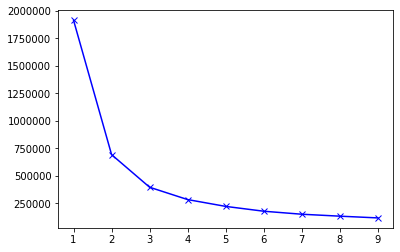

In [26]:
plt.plot(k,sum_distance,'bx-')
plt.show()

In [27]:
algo=KMeans(n_clusters=4)
algo.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
df2["cluster"]=algo.predict(df2)

In [29]:
df2.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,3
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,3
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1


In [30]:
# Capturing the Cluster Labels
clusterNum = 4
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 3 ... 3 3 3]


In [31]:
labels

array([1, 0, 3, ..., 3, 3, 3])

### Elbow method:

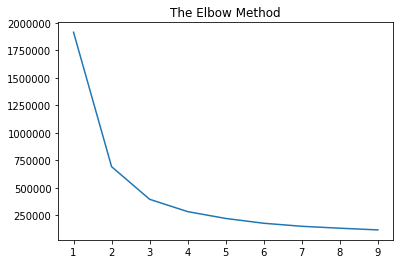

In [32]:
k=range(1,10)
plt.plot(k,sum_squ_diss)
plt.title('The Elbow Method')
plt.show()

In [33]:
sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, random_state=None)

0.49212857963023715